In [1]:
import csv
import gzip
import json
import sys
import requests

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_epss_data(date: str) -> dict:  # date = YYYY-mm-dd
    raw_data = requests.get('https://epss.cyentia.com/epss_scores-{}.csv.gz'.format(date)).content
    data = gzip.decompress(raw_data).decode('utf-8')

    result = dict()
    reader = csv.reader(data.splitlines())
    next(reader)
    next(reader)
    for row in reader:
        result[row[0]] = float(row[1])

    return result

In [3]:
def initialize_nvdcve_data() -> dict:
    result = dict()
    for year in range(2002, 2024 + 1):
        raw_data = requests.get('https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-{}.json.gz'.format(year)).content
        data = json.loads(gzip.decompress(raw_data).decode('utf-8'))

        for o in data['CVE_Items']:
            try:
                cve = o['cve']['CVE_data_meta']['ID']
                if 'baseMetricV3' not in o['impact'] and 'baseMetricV2' not in o['impact']:
                    continue
                if 'baseMetricV3' in o['impact']:
                    severity = o['impact']['baseMetricV3']['cvssV3']['baseSeverity']
                else:
                    severity = o['impact']['baseMetricV2']['severity']
                result[cve] = severity
            except:
                print(o['cve']['CVE_data_meta']['ID'])
        print('Finished year', year)
    return result
        

In [4]:
nvdcve = initialize_nvdcve_data()

Finished year 2002
Finished year 2003
Finished year 2004
Finished year 2005
Finished year 2006
Finished year 2007
Finished year 2008
Finished year 2009
Finished year 2010
Finished year 2011
Finished year 2012
Finished year 2013
Finished year 2014
Finished year 2015
Finished year 2016
Finished year 2017
Finished year 2018
Finished year 2019
Finished year 2020
Finished year 2021
Finished year 2022
Finished year 2023
Finished year 2024


In [5]:
# Инициализация контрольных точек
epss_history = list()
for year in range(2023, 2024 + 1):
    for month in range(1, 13 if year != 2024 else 8):
        for day in [1, 9, 17, 25]:
            date = '{}-{}-{}'.format(year, str(month).zfill(2), str(day).zfill(2))
            epss_history.append((load_epss_data(date), date))

In [6]:
for epss in epss_history:
    print(epss[0]['CVE-2006-4437'])

0.10995
0.10995
0.10995
0.10995
0.10995
0.10995
0.10995
0.10995
0.10995
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14716
0.14307
0.14307
0.14307
0.14307
0.14307
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.13128
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387
0.15387


In [7]:
def show_plot(cve: str): 
    data = [(float(o[0][cve]),o[1]) for o in epss_history]
    y = [o[0] for o in data]
    x = [o[1] for o in data]

    plt.figure().set_figwidth(15)
    plt.plot(x,y)
    plt.xticks(rotation=90)
    plt.show()

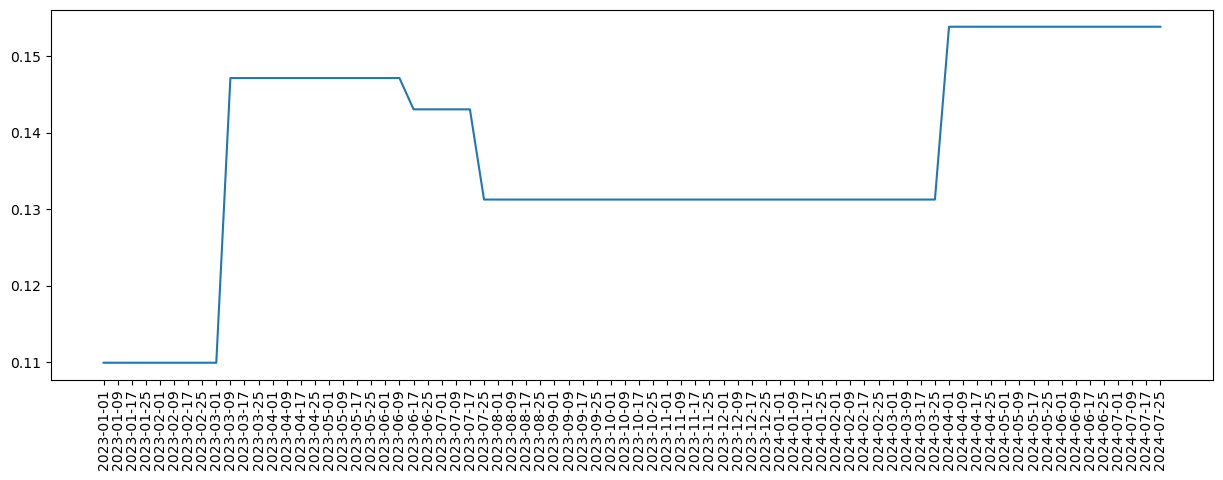

In [8]:
show_plot('CVE-2006-4437')

In [9]:
# medium, level (0.5,0.6,0.7,0.8)
levels = dict()
levels_num = dict()
severities = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
levels_values = [x / 10.0 for x in range(1, 10)]
for severity in severities:
    levels[severity] = dict()
    levels_num[severity] = dict()
    for level in levels_values:
        levels[severity][level] = list()
        levels_num[severity][level] = 0

for cve,severity in nvdcve.items():
    epss = epss_history[-1][0].get(cve, -1)
    epss_fixed = int(float(epss) * 10) / 10
    if epss_fixed < 0.1:
        continue
    levels[severity][epss_fixed].append(cve)
    levels_num[severity][epss_fixed] += 1

In [10]:
for severity, vals in levels.items():
    for level, lst in levels[severity].items():
        print(severity, level, len(lst))


for k, v in levels.items():
    print(k, v[0.9][-10:-1])



LOW 0.1 38
LOW 0.2 9
LOW 0.3 4
LOW 0.4 4
LOW 0.5 4
LOW 0.6 3
LOW 0.7 10
LOW 0.8 6
LOW 0.9 26
MEDIUM 0.1 962
MEDIUM 0.2 350
MEDIUM 0.3 165
MEDIUM 0.4 122
MEDIUM 0.5 142
MEDIUM 0.6 111
MEDIUM 0.7 137
MEDIUM 0.8 232
MEDIUM 0.9 589
HIGH 0.1 2344
HIGH 0.2 1019
HIGH 0.3 518
HIGH 0.4 410
HIGH 0.5 425
HIGH 0.6 403
HIGH 0.7 506
HIGH 0.8 864
HIGH 0.9 1878
CRITICAL 0.1 369
CRITICAL 0.2 131
CRITICAL 0.3 143
CRITICAL 0.4 101
CRITICAL 0.5 86
CRITICAL 0.6 87
CRITICAL 0.7 74
CRITICAL 0.8 144
CRITICAL 0.9 485
LOW ['CVE-2009-0093', 'CVE-2009-1536', 'CVE-2012-0021', 'CVE-2012-1923', 'CVE-2013-5397', 'CVE-2013-5398', 'CVE-2014-3566', 'CVE-2015-1648', 'CVE-2015-4000']
MEDIUM ['CVE-2021-34448', 'CVE-2021-3654', 'CVE-2021-41174', 'CVE-2021-41349', 'CVE-2021-45105', 'CVE-2022-26925', 'CVE-2022-27926', 'CVE-2022-28810', 'CVE-2023-23752']
HIGH ['CVE-2023-38205', 'CVE-2023-46805', 'CVE-2023-49103', 'CVE-2023-4966', 'CVE-2023-52251', 'CVE-2023-7028', 'CVE-2024-21683', 'CVE-2024-21893', 'CVE-2024-24919']
CRITICAL 

In [11]:
# check epss score for CVEs in nuclei & exploit-db
raw_data = requests.get('https://raw.githubusercontent.com/projectdiscovery/nuclei-templates/main/cves.json').content.decode('utf-8')
nuclei_cve_epss = dict()
for line in raw_data.splitlines():
    try:
        data = json.loads(line)
        epss = epss_history[-1][0][data['ID']]
        print(data['ID'], epss)
        nuclei_cve_epss[data['ID']] = epss
    except:
        print(data['ID'], 'No info')

CVE-2000-0114 0.15958
CVE-2001-0537 0.87683
CVE-2002-1131 0.04774
CVE-2004-0519 0.02285
CVE-2004-1965 0.0113
CVE-2005-2428 0.01129
CVE-2005-3344 0.01539
CVE-2005-3634 0.02843
CVE-2005-4385 0.00294
CVE-2006-1681 0.01015
CVE-2006-2842 0.28102
CVE-2007-0885 0.00927
CVE-2007-3010 0.95961
CVE-2007-4504 0.02171
CVE-2007-4556 0.21361
CVE-2007-5728 0.01496
CVE-2008-1059 0.01493
CVE-2008-1061 0.00697
CVE-2008-1547 0.04411
CVE-2008-2398 0.00329
CVE-2008-2650 0.06344
CVE-2008-4668 0.01018
CVE-2008-4764 0.02135
CVE-2008-5587 0.024
CVE-2008-6080 0.03314
CVE-2008-6172 0.00509
CVE-2008-6222 0.01302
CVE-2008-6465 0.00421
CVE-2008-6668 0.00359
CVE-2008-6982 0.0038
CVE-2008-7269 0.01544
CVE-2009-0347 0.10607
CVE-2009-0545 0.97081
CVE-2009-0932 0.04048
CVE-2009-1151 0.88938
CVE-2009-1496 0.01134
CVE-2009-1558 0.02293
CVE-2009-1872 0.32712
CVE-2009-2015 0.01197
CVE-2009-2100 0.02365
CVE-2009-3053 0.00509
CVE-2009-3318 0.01062
CVE-2009-4202 0.02856
CVE-2009-4223 0.0111
CVE-2009-4679 0.00809
CVE-2009-5020 0

           0.1   0.2  0.3  0.4  0.5  0.6  0.7  0.8   0.9
LOW         38     9    4    4    4    3   10    6    26
MEDIUM     962   350  165  122  142  111  137  232   589
HIGH      2344  1019  518  410  425  403  506  864  1878
CRITICAL   369   131  143  101   86   87   74  144   485


<Axes: xlabel='level', ylabel='num'>

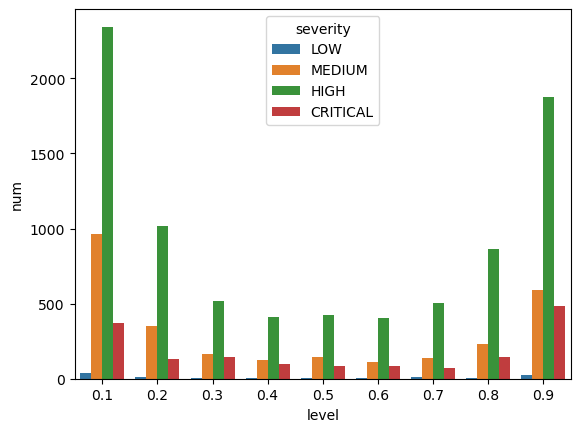

In [12]:
import pandas as pd

levels_df = pd.DataFrame(levels_num, columns=severities)
print(levels_df.transpose())
levels_df = levels_df.stack().reset_index()
levels_df.columns = ['level', 'severity', 'num']
#print(levels_df)
sns.barplot(x='level', y='num', hue='severity', data=levels_df)

In [13]:
# is there any cve with high epss without actual exploit?
for vuln in levels['CRITICAL'][0.9]:
    if not vuln.startswith('CVE-202'):
        continue
    if vuln in nuclei_cve_epss:
        continue
    print(vuln)

CVE-2020-0646
CVE-2020-0796
CVE-2020-10879
CVE-2020-10987
CVE-2020-11651
CVE-2020-11698
CVE-2020-1350
CVE-2020-14825
CVE-2020-2555
CVE-2020-27131
CVE-2020-27955
CVE-2020-2883
CVE-2020-29390
CVE-2020-3243
CVE-2020-3250
CVE-2020-35665
CVE-2020-5722
CVE-2020-7115
CVE-2020-7247
CVE-2020-7357
CVE-2020-8518
CVE-2020-8606
CVE-2020-8794
CVE-2021-22893
CVE-2021-31166
CVE-2021-31761
CVE-2021-35211
CVE-2021-35394
CVE-2021-37415
CVE-2022-20699
CVE-2022-24637
CVE-2022-31137
CVE-2022-3218
CVE-2022-37061
CVE-2022-41352
CVE-2022-4221
CVE-2022-42889
CVE-2023-21554
CVE-2023-23397
CVE-2023-28771
CVE-2023-34039
CVE-2023-3519
CVE-2023-46604
CVE-2024-23897


In [14]:
# generate trivy file: trivy image node:latest -f json -o ubuntu:jammy-20211122
# list all cves in trivy report: cat ubuntu:jammy-20211122 | jq '.Results[].Vulnerabilities[].VulnerabilityID' | sed 's/"//g' > ubuntu:jammy-20211122.cves
import os

cves = set()
for filename in os.listdir('./'):
    if not filename.endswith('.cves'):
        continue
    with open(filename) as f:
        cves_fl = set()
        high_c = 0
        critical_c = 0
        data = f.readlines()
        
        for line in data:
            line = line.strip()
            cves.add(line)
            try:
                epss = float(epss_history[-1][0][line])
                severity = nvdcve.get(line, 'UNKNOWN')
                cves_fl.add((line, epss, severity))
            except:
                pass
                #print(line, 'No info')
        for cve,epss,severity in cves_fl:
            if severity == 'CRITICAL':
                critical_c += 1
            if severity == 'HIGH':
                high_c += 1
        print(filename)
        print('Num cves:', len(cves_fl))
        t = list(cves_fl)
        t.sort(key=lambda x: -x[1])
        print('Highest EPSS cve', t[0])
        print('Critical cves', critical_c)
        print('High cves', high_c)
        print()


postgres13.16.cves
Num cves: 449
Highest EPSS cve ('CVE-2008-3134', 0.05759, 'MEDIUM')
Critical cves 10
High cves 77

python3.9-slim.cves
Num cves: 49
Highest EPSS cve ('CVE-2019-1010024', 0.02151, 'MEDIUM')
Critical cves 2
High cves 12

ubuntujammy-20211122.cves
Num cves: 449
Highest EPSS cve ('CVE-2008-3134', 0.05759, 'MEDIUM')
Critical cves 10
High cves 77

nodelatest.cves
Num cves: 449
Highest EPSS cve ('CVE-2008-3134', 0.05759, 'MEDIUM')
Critical cves 10
High cves 77

eclipse-temurin8u422-b05-jdk.cves
Num cves: 15
Highest EPSS cve ('CVE-2016-20013', 0.00154, 'HIGH')
Critical cves 0
High cves 1

python3.12.5-bullseye.cves
Num cves: 449
Highest EPSS cve ('CVE-2008-3134', 0.05759, 'MEDIUM')
Critical cves 10
High cves 77

alpine3.17.7.cves
Num cves: 7
Highest EPSS cve ('CVE-2023-42364', 0.00044, 'MEDIUM')
Critical cves 0
High cves 0



In [15]:
print(len(cves))
critical_cve = set()
high_cve = set()
for cve in cves:
    sev = nvdcve.get(cve, None)
    if sev is None:
        continue
    if sev == 'CRITICAL':
        critical_cve.add(cve)
    if sev == 'HIGH':
        high_cve.add(cve)
print(len(critical_cve))
print(critical_cve)
print(len(high_cve))

648
11
{'CVE-2019-1010022', 'CVE-2024-42154', 'CVE-2024-5171', 'CVE-2023-5841', 'CVE-2017-9117', 'CVE-2024-32002', 'CVE-2024-38428', 'CVE-2023-6879', 'CVE-2023-34152', 'CVE-2017-17479', 'CVE-2023-45853'}
90


In [16]:
def load_redhat_datafeed():
    url = 'https://access.redhat.com/labs/securitydataapi/cve.json?page={}'
    page = 0
    cves = list()
    while True:
        page += 1
        data = json.loads(requests.get(url.format(page)).content)
        if len(data) == 0:
            break
        for entry in data:
            cves.append(entry['CVE'])
    return cves

def load_debian_datafeed():
    import bz2
    import xml.etree.ElementTree as ET
    cves = list()
    urls = ['https://www.debian.org/security/oval/oval-definitions-bookworm.xml.bz2',
            'https://www.debian.org/security/oval/oval-definitions-bullseye.xml.bz2',
            'https://www.debian.org/security/oval/oval-definitions-buster.xml.bz2',
            'https://www.debian.org/security/oval/oval-definitions-jessie.xml.bz2',
            'https://www.debian.org/security/oval/oval-definitions-stretch.xml.bz2',
            'https://www.debian.org/security/oval/oval-definitions-wheezy.xml.bz2']
    for url in urls:
        raw_data = requests.get(url).content
        data = bz2.decompress(raw_data)
        xml = ET.fromstring(data)
        for definition in xml[1]:
            cves.append(definition[0][0].text.split()[0])
    return cves


def load_ubuntu_datafeed():
    from bs4 import BeautifulSoup
    import bz2
    import xml.etree.ElementTree as ET
    url = 'https://security-metadata.canonical.com/oval/'
    r = requests.get(url)
    data = BeautifulSoup(r.text, 'html.parser')
    cves = list()

    for o in data.find_all('a'):
        href = o['href']
        if 'cve.oval' not in href:
            continue
        raw_data = requests.get(url + href.split('/')[2]).content
        data = bz2.decompress(raw_data)
        xml = ET.fromstring(data)
        for definition in xml[1]:
            cves.append(definition[0][0].text.split()[0])
    return cves
        

def load_alpine_datafeed():
    from bs4 import BeautifulSoup
    url = 'https://secdb.alpinelinux.org/'
    r = requests.get(url)
    data = BeautifulSoup(r.text, 'html.parser')
    cves = list()
    
    for o in data.find_all('a'):
        href = o['href']
        if not href.endswith('/'):
            continue
        if href.startswith('..'):
            continue
        for filename in ['community.json', 'main.json']:
            try:
                r = requests.get(url + href + filename)
                json_data = json.loads(r.text)
                for package in json_data['packages']:
                    for p_version, p_cves in package['pkg']['secfixes'].items():
                        cves.extend(p_cves)
            except:
                print('Not found', url + href + filename)
    return cves

In [17]:
redhat_cves = set(load_redhat_datafeed())
debian_cves = set(load_debian_datafeed())
ubuntu_cves = set(load_ubuntu_datafeed())
alpine_cves = set(load_alpine_datafeed())

Not found https://secdb.alpinelinux.org/v3.2/community.json


In [18]:
def make_barplot(cves: list):
    levels = dict()
    levels_num = dict()
    severities = ['UNKNOWN', 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
    levels_values = [x / 10.0 for x in range(1, 10)]
    for severity in severities:
        levels[severity] = dict()
        levels_num[severity] = dict()
        for level in levels_values:
            levels[severity][level] = list()
            levels_num[severity][level] = 0
    
    for cve in cves:
        epss = epss_history[-1][0].get(cve, -1)
        epss_fixed = int(float(epss) * 10) / 10
        severity = nvdcve.get(cve, 'UNKNOWN')
        if epss_fixed < 0.1:
            continue
        levels[severity][epss_fixed].append(cve)
        levels_num[severity][epss_fixed] += 1

    import pandas as pd

    levels_df = pd.DataFrame(levels_num, columns=severities)
    print(levels_df.transpose())
    levels_df = levels_df.stack().reset_index()
    levels_df.columns = ['level', 'severity', 'num']
    #print(levels_df)
    sns.barplot(x='level', y='num', hue='severity', data=levels_df)

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW        10    1    1    2    0    1    3    3    4
MEDIUM    247   80   39   20   38   19   28   45  187
HIGH      414  221  106   72   67   65   75  120  388
CRITICAL   58   13   24   17    9   18   16   17   70


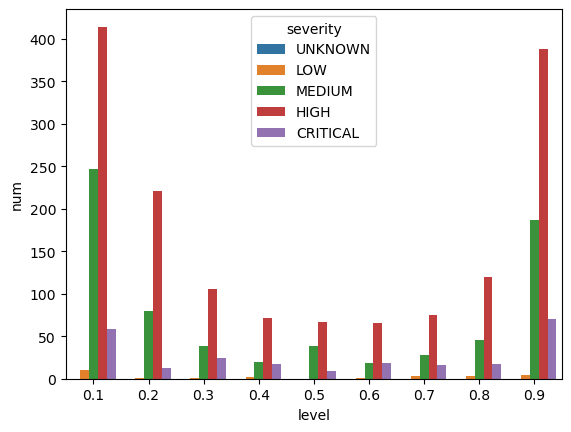

In [19]:
make_barplot(list(redhat_cves))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         8    1    2    1    0    2    1    0    4
MEDIUM    206   76   33   20   23   10   23   30  125
HIGH      211  101   67   29   32   44   45   56  189
CRITICAL   48   17   18    9    8   11   11   12   45


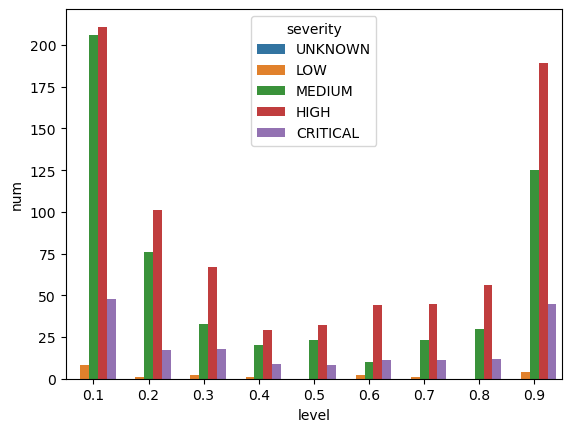

In [20]:
make_barplot(list(debian_cves))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         1    0    0    0    0    1    1    0    2
MEDIUM     69   24   12   11   14    9   12   17   62
HIGH      162   74   37   25   30   49   44   80  170
CRITICAL   61   22   24   15    9   11   10   13   74


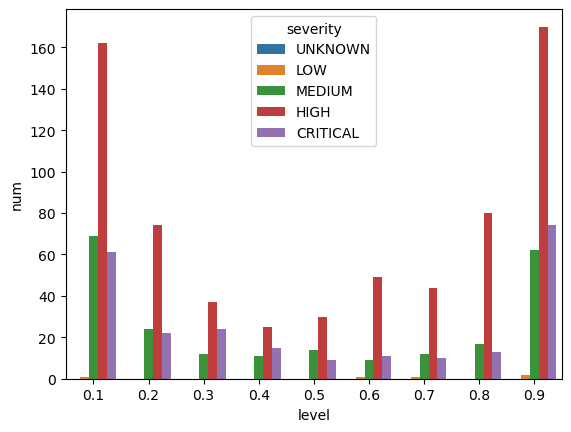

In [21]:
make_barplot(list(ubuntu_cves))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         0    0    0    0    0    0    0    0    0
MEDIUM     11    6    3    2    2    3    1    2   12
HIGH       29   22   10    8   13    9   12   14   35
CRITICAL   22    5    9    5    3    4    3    6   21


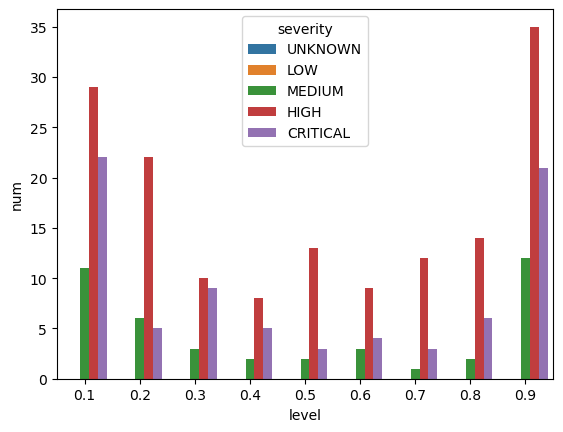

In [22]:
make_barplot(list(alpine_cves))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW        11    2    2    2    0    2    3    3    5
MEDIUM    328  109   47   25   44   25   36   54  213
HIGH      517  268  143   90   75   89   90  146  441
CRITICAL   71   25   29   19   10   20   18   18   98


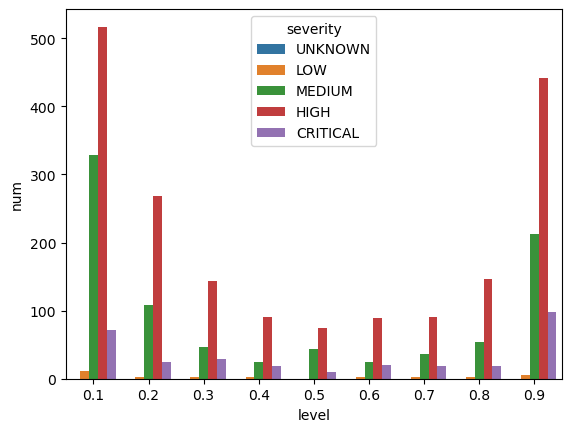

In [23]:
general = list(set(redhat_cves | debian_cves | ubuntu_cves | alpine_cves))
make_barplot(general)

In [24]:
def load_osv_datafeed(folder: str):
    import os
    import zipfile
    import urllib.request
    url = 'https://www.googleapis.com/storage/v1/b/osv-vulnerabilities/o/{}%2Fall.zip'.format(folder)
    mediaLink = requests.get(url).json()['mediaLink']
    urllib.request.urlretrieve(mediaLink, './osv_data.zip')

    cves = list()
    with zipfile.ZipFile('./osv_data.zip') as z_file:
        for f_name in z_file.namelist():
            with z_file.open(f_name) as f:
                data = json.load(f)
                if 'aliases' not in data:
                    continue
                for alias in data['aliases']:
                    if alias.startswith('CVE-'):
                        cves.append(alias)

    os.remove('./osv_data.zip')
    return cves
                        

In [25]:
pypi = load_osv_datafeed('PyPI')
npm = load_osv_datafeed('npm')
go = load_osv_datafeed('Go')
maven = load_osv_datafeed('Maven')

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         1    0    0    0    0    0    0    0    0
MEDIUM      3    0    0    0    0    0    0    0    5
HIGH        7    1    0    1    0    3    0    0    6
CRITICAL    8    0    0    1    1    1    1    5    7


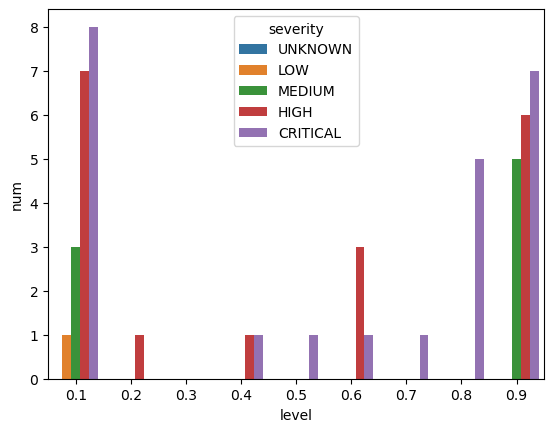

In [26]:
make_barplot(list(set(pypi)))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         0    0    0    0    0    0    0    0    0
MEDIUM      0    0    0    0    0    0    0    0    3
HIGH        0    4    0    0    0    1    2    2    3
CRITICAL    8    2    1    2    1    0    0    1    4


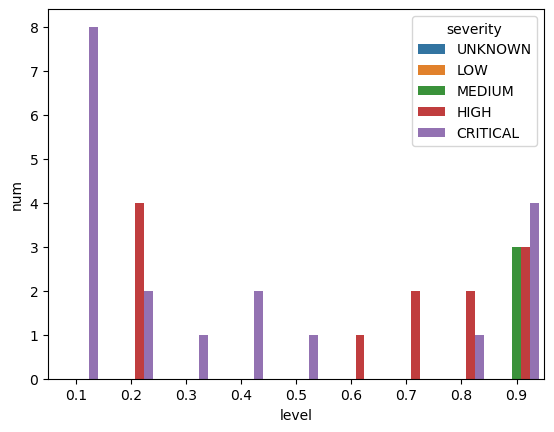

In [27]:
make_barplot(list(set(npm)))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         0    0    0    0    0    0    0    0    0
MEDIUM      0    0    0    0    0    0    0    0    2
HIGH        4    3    1    0    0    1    3    1    5
CRITICAL    1    0    1    0    0    0    0    0    1


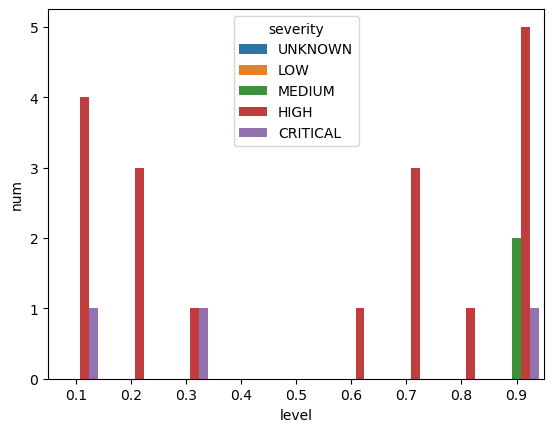

In [28]:
make_barplot(list(set(go)))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         1    0    0    0    0    0    1    0    0
MEDIUM     18    7    1    2   10    3    3    1   29
HIGH       12    5    4    2    6    2    6    6   39
CRITICAL    5    4    6    5    1    6    5    4   39


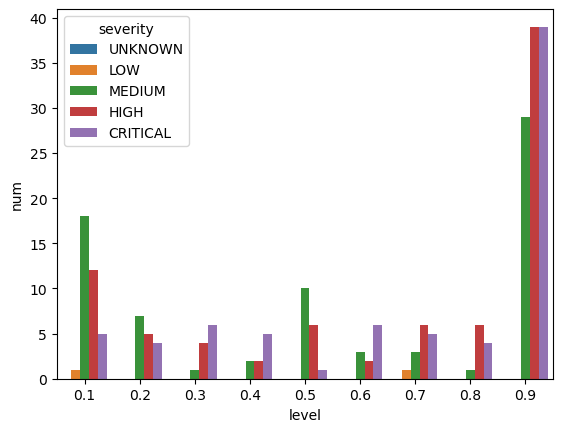

In [29]:
make_barplot(list(set(maven)))

          0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
UNKNOWN     0    0    0    0    0    0    0    0    0
LOW         2    0    0    0    0    0    1    0    0
MEDIUM     21    7    1    2   10    3    3    1   38
HIGH       23   13    5    3    6    5   10    9   52
CRITICAL   21    6    8    8    3    7    6   10   50
12401


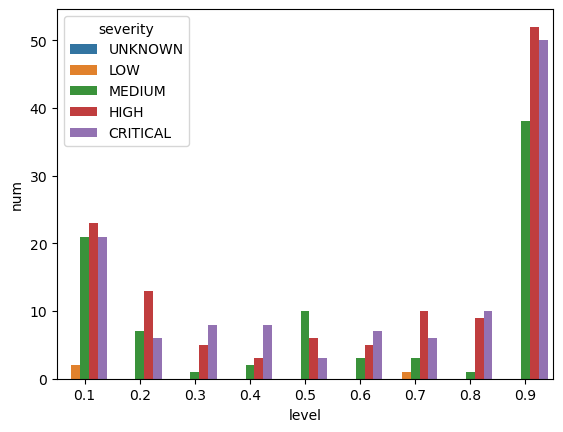

In [30]:
make_barplot(list(set(go + maven + npm + pypi)))
print(len(list(set(go + maven + npm + pypi))))

In [31]:
num = 0
for x in list(set(go + maven + npm + pypi)):
    epss = epss_history[-1][0].get(x, 0)
    if epss >= 0.1:
        num += 1

print(num)

334


In [32]:
# generate report -> depscan -o rep.json
# cat rep-universal.json  | jq '.id' | sed 's/"//g' | sort -u >> cves
import os

cves = set()
for filename in os.listdir('./apps/'):
    filename = './apps/' + filename
    if not filename.endswith('.cves'):
        continue
    with open(filename) as f:
        cves_fl = set()
        high_c = 0
        critical_c = 0
        data = f.readlines()
        
        for line in data:
            line = line.strip()
            cves.add(line)
            try:
                epss = float(epss_history[-1][0][line])
                severity = nvdcve.get(line, 'UNKNOWN')
                cves_fl.add((line, epss, severity))
            except:
                pass
                #print(line, 'No info')
        for cve,epss,severity in cves_fl:
            if severity == 'CRITICAL':
                critical_c += 1
            if severity == 'HIGH':
                high_c += 1
        print(filename)
        print('Num cves:', len(cves_fl))
        t = list(cves_fl)
        t.sort(key=lambda x: -x[1])
        print('Highest EPSS cve', t[0:3])
        print('Critical cves', critical_c)
        print('High cves', high_c)
        print()

./apps/private_java.cves
Num cves: 33
Highest EPSS cve [('CVE-2023-44487', 0.70756, 'HIGH'), ('CVE-2022-1471', 0.03622, 'CRITICAL'), ('CVE-2016-1000027', 0.02444, 'CRITICAL')]
Critical cves 2
High cves 7

./apps/juice-shop.cves
Num cves: 51
Highest EPSS cve [('CVE-2019-10744', 0.02082, 'CRITICAL'), ('CVE-2020-8203', 0.01667, 'HIGH'), ('CVE-2023-32314', 0.01326, 'CRITICAL')]
Critical cves 8
High cves 14

./apps/vampi.cves
Num cves: 6
Highest EPSS cve [('CVE-2019-10086', 0.00331, 'HIGH'), ('CVE-2023-30861', 0.00194, 'HIGH'), ('CVE-2023-36632', 0.00108, 'HIGH')]
Critical cves 0
High cves 6

./apps/private_nodejs.cves
Num cves: 32
Highest EPSS cve [('CVE-2021-23337', 0.00606, 'HIGH'), ('CVE-2021-23434', 0.00489, 'HIGH'), ('CVE-2020-15256', 0.00306, 'CRITICAL')]
Critical cves 4
High cves 13

./apps/writeups.cves
Num cves: 11
Highest EPSS cve [('CVE-2022-22965', 0.97485, 'CRITICAL'), ('CVE-2016-1000027', 0.02444, 'CRITICAL'), ('CVE-2020-25638', 0.00352, 'HIGH')]
Critical cves 2
High cves 2



In [33]:
#